In [1]:
from load_data.utils import process_all_documents
from load_data import load_dataframe, process_text
from plots import plot_counter_lemmas
from plots.topics import interactive_exploration, plot_topics, plot_similarities
from topic_modeling.utils import check_coherence_for_topics_num
from topic_modeling.lda_model import find_best_model, find_best_topics_num
from topic_modeling.topic_probs import get_linkage_matrix, get_similarities, get_topic_probs

import pandas as pd
from collections import Counter

c:\Users\artur\AppData\Local\pypoetry\Cache\virtualenvs\mair-policies-comparision-jbXYZVYX-py3.10\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
paragraphs_names= {'Summary': ['Summary'],
 "National schemes": ['Description of national schemes providing minimum income support'],
 'Links with labour market activation': ['Links with labour market activation'],
 "Links to social services": ['Links to social services and integrated provision of targeted social services'],
 'Governance mechanisms': ['Governance mechanisms'],
 'Impact of minimum income schemes': ['Impact of minimum income schemes', 'Impact of MI schemes'],
 'Sources': ['Sources']}

In [ ]:
df = process_all_documents('ue_raports/', paragraphs_names, 'ue_raports/txt_files/', 'Sources')
df.to_csv('documents.csv')
dft = load_dataframe('documents.csv')
processed_df = process_text(dft)

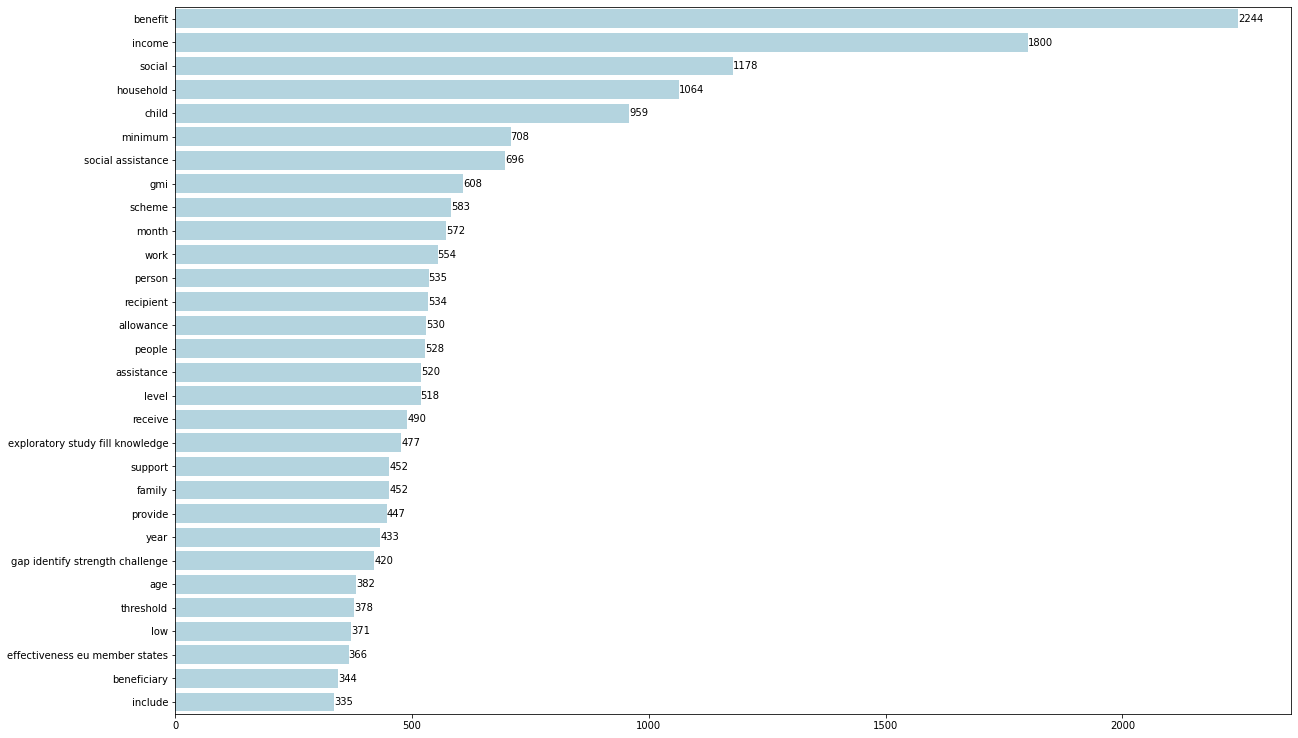

In [4]:
filter_dict = {'paragraph':'National schemes'}
plot_counter_lemmas(processed_df, filter_dict)

In [5]:
filtered_lemmas = processed_df.loc[(processed_df[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)][
        "lemmas"
    ]
counter = Counter(filtered_lemmas.sum()).most_common(8)
common_words = [word for word, cnt in counter]
topic_numbers_range = (2, 11)

In [6]:
(filtered_lemmas, models, encoded_docs, lemmas_dictionary, cvs) = check_coherence_for_topics_num(
    processed_df,
    filter_dict,
    common_words,
    topic_numbers_range
)


100%|██████████| 9/9 [00:43<00:00,  4.82s/it]


In [7]:
num_topics = find_best_topics_num(cvs, topic_numbers_range)
lda_model = find_best_model(encoded_docs, lemmas_dictionary, cvs, topic_numbers_range)

In [8]:
interactive_exploration(lda_model, encoded_docs, lemmas_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.037271 -0.034861       1        1  26.449993
0     -0.053790 -0.043277       2        1  25.190657
2      0.123352 -0.007094       3        1  25.001927
1     -0.032290  0.085232       4        1  23.357423, topic_info=                                Term        Freq       Total Category  \
34                        assistance  509.000000  509.000000  Default   
419                        recipient  523.000000  523.000000  Default   
888                          service  317.000000  317.000000  Default   
1111                 gmi beneficiary  136.000000  136.000000  Default   
46                       beneficiary  339.000000  339.000000  Default   
...                              ...         ...         ...      ...   
332   minimum income scheme february   82.640492  296.868230   Topic4   
379                           people   90.518850  517.829910   Topic4   
161                       employment   76.429376  309.298766   Topic4   
296                            level   79.162877  507.607435   Topic4   
263                          include   76.105392  328.792415   Topic4   

      logprob  loglift  
34    30.0000  30.0000  
419   29.0000  29.0000  
888   28.0000  28.0000  
1111  27.0000  27.0000  
46    26.0000  26.0000  
...       ...      ...  
332   -5.2494   0.1755  
379   -5.1583  -0.2898  
161   -5.3275   0.0563  
296   -5.2924  -0.4039  
263   -5.3317  -0.0091  

[339 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1031      3  0.948041     absence
1033      4  0.876535  acceptable
951       3  0.931527  accordance
4         1  0.329821     account
4         2  0.448556     account
...     ...       ...         ...
948       3  0.040014       young
948       4  0.220078       young
1228      2  0.078567       youth
1228      3  0.157133       youth
1228      4  0.785666       youth

[821 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:
fig = plot_topics(lda_model, filtered_lemmas, int(num_topics/2), 2, " ", (12,5*int(num_topics/2)))

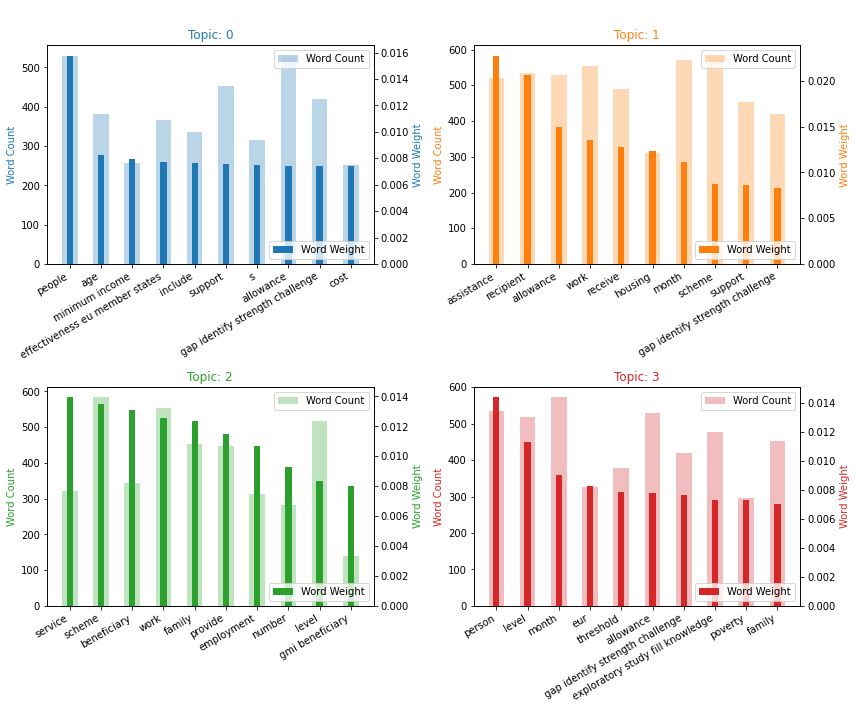

In [10]:
fig

In [11]:
modeling_results, topic_probs = get_topic_probs(processed_df, filter_dict, lda_model, num_topics, encoded_docs)
linkage = get_linkage_matrix(topic_probs)
similarities = get_similarities(topic_probs)

<Figure size 864x576 with 0 Axes>

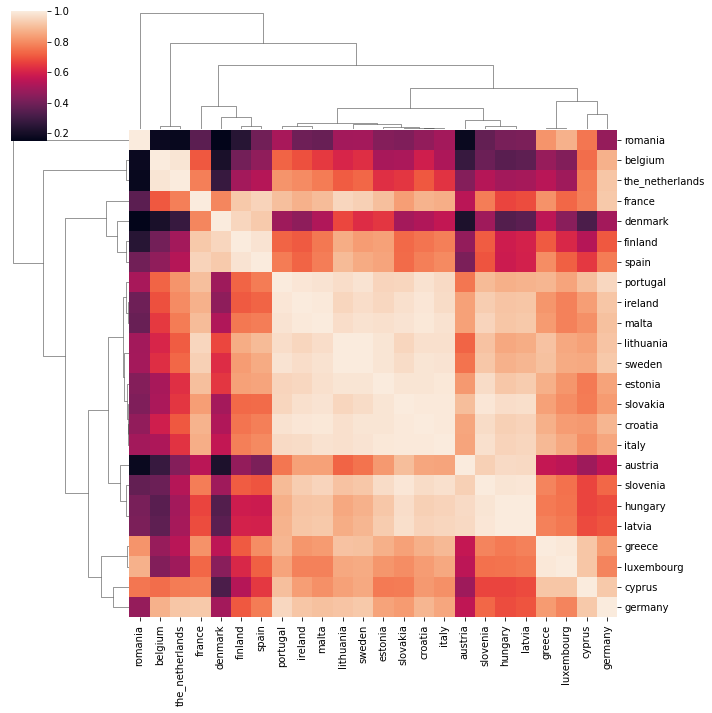

In [12]:
plot_similarities(similarities, topic_probs, linkage)